In [31]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

In [32]:
Resposnse=pd.read_csv('responses.csv',header=0)
Resposnse.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


###### 1Load the data and extract the relevant columns

In [33]:
Resposnse= Resposnse[["Finances","Gender","Village - town","Healthy eating"]]
Resposnse.head(5) 

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,village,4.0
1,3.0,female,city,3.0
2,2.0,female,city,3.0
3,2.0,female,city,3.0
4,4.0,female,village,4.0


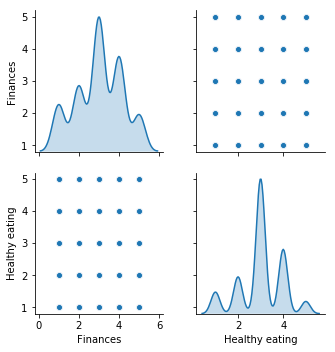

In [34]:
sns.pairplot( Resposnse , diag_kind='kde')

###### Explore the data and understand how the data is distributed? Is there any outlier or missing value? And Share your insights.


In [35]:
print(Resposnse.shape)
print(Resposnse.info()) # there ase some null values

(1010, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Finances          1007 non-null float64
Gender            1004 non-null object
Village - town    1006 non-null object
Healthy eating    1007 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB
None


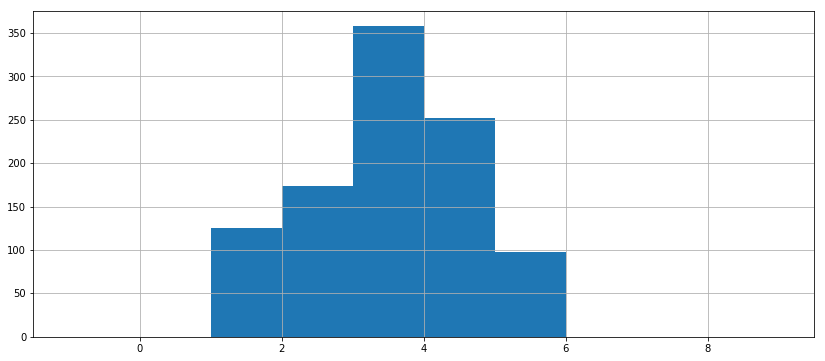

In [36]:
bin_values = np.arange(start=-1, stop=10, step=1)
Resposnse['Finances'].hist(bins=bin_values, figsize=[14,6])  # the distribution of data is normal

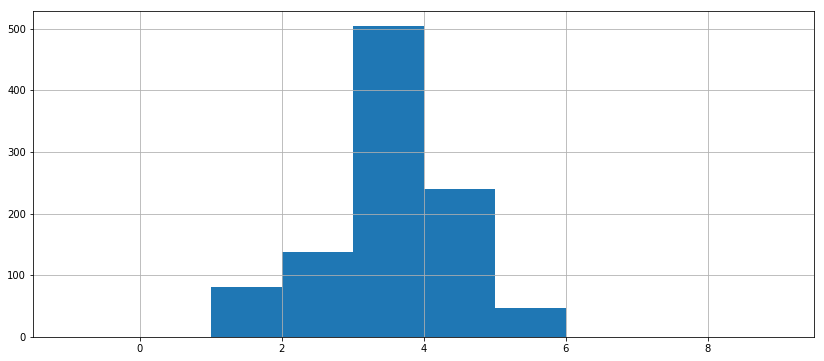

In [37]:
bin_values = np.arange(start=-1, stop=10, step=1)
Resposnse['Healthy eating'].hist(bins=bin_values, figsize=[14,6]) # the distribution of data is normal

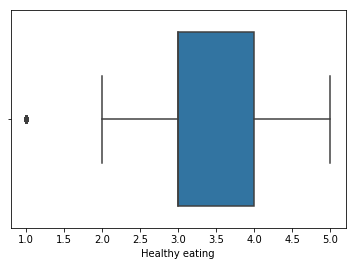

In [38]:
sns.boxplot(x=Resposnse["Healthy eating"])  # there are some outliers for heatthy eating column

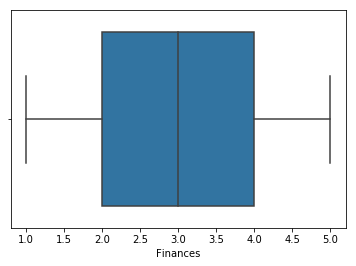

In [39]:
sns.boxplot(x=Resposnse["Finances"]) # there is no outlier for finances

###### 2.Create Hypothesis on the following questions 


###### Is saving money (finances) gender dependant?

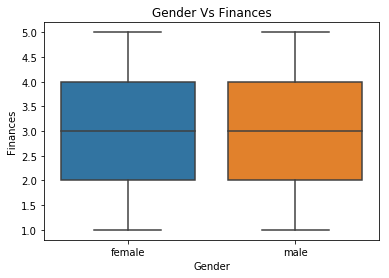

In [40]:
sns.boxplot(x = "Gender", y = "Finances", data = Resposnse)
plt.title('Gender Vs Finances')
plt.show()

The boxplots show almost ssimilar shapes, location and spreads and there is no outlier

Null and Alternate Hypothesis :

H0 = Finances is not dependent on Gender

HA = Finances is dependent on Gender.


considering the significance level as α = 0.05

In [41]:
mod = ols('Finances ~ Gender', data = Resposnse).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq     df         F    PR(>F)
Gender       4.959672    1.0  3.786949  0.051934
Residual  1308.365004  999.0       NaN       NaN


##### since the Calculated F value (0.051934) is greater than the level of significance decided so we can reject the null hypothesis 

###### Is there any differences in money saving (finances) between people from city or village?

###### Null and Alternate Hypothesis :
*    $H_0$ = There is no differences in Finances between people from City or Village.
*    $H_A$ = There is differences in Finances between people from City or Village.

considering the significance level as α = 0.05

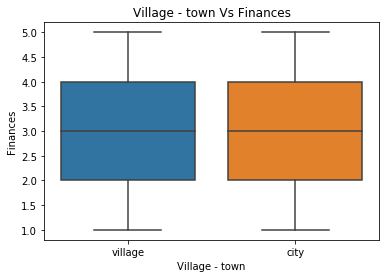

In [42]:
sns.boxplot(x = "Village - town", y = "Finances", data = Resposnse)
plt.title('Village - town Vs Finances')
plt.show()

from the box plot its clear that there is no outliar in terms of data 

In [43]:
mod = ols('Finances ~ Resposnse_rel.iloc[:,2]', data = Resposnse).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                               sum_sq      df         F    PR(>F)
Resposnse_rel.iloc[:, 2]     9.438543     1.0  7.233852  0.007273
Residual                  1306.078904  1001.0       NaN       NaN


since the Calculated F value (0.007273) is less than the level of significance so we can accept the null hypothesis.
so we can say that there is a significance difference in Finances between people from City or Village 


#### Do Women have a Healthier Lifestyle than Men?

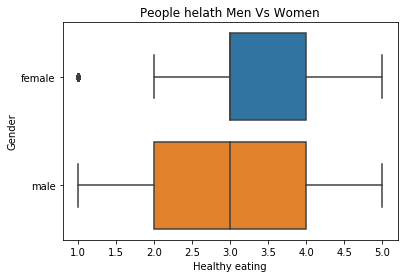

In [44]:
sns.boxplot(x = "Healthy eating", y = "Gender", data = Resposnse)
plt.title('People helath Men Vs Women')
plt.show()

In [45]:
From the nbox plot we can see that there is one outliar in female data and the data of female is right skewed data .
And we can also say from the graph that women are healthier than men

SyntaxError: invalid syntax (<ipython-input-45-3b896f01951a>, line 1)

###### Null and Alternate Hypothesis :
*    $H_0$ = Women have Healthier Lifestyle than Men.
*    $H_A$ = Women don't have Healthier Lifestyle than Men.

considering the significance level as α = 0.05

In [ ]:
mod = ols('Resposnse_rel.iloc[:,3] ~ Gender', data = Resposnse).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

since the Calculated F value (0.042753) is less than the level of significance so we can accept the null hypothesis.
so we can say that Women have Healthier Lifestyle than Men.

###### Are Village People Healthier than City People?

In [ ]:
sns.boxplot(x = "Village - town", y = "Healthy eating", data = Resposnse)
plt.title('People helath Village Vs city')
plt.show()

From the boxplot as we can see that there are few outlier in the data .but from the graph its clear that both village and city people are healthy

###### Let us define Null and Alternate Hypothesis :
*    $H_0$ = Village People are  Healthier than City People.
*    $H_A$ = Village People are not Healthier than City People.

In [ ]:
mod = ols('Resposnse_rel.iloc[:,3] ~ Resposnse_rel.iloc[:,2]', data = Resposnse).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

In [ ]:
mod = ols('Resposnse_rel.iloc[:,3] ~ Resposnse_rel.iloc[:,2]', data = Resposnse).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

since the Calculated F value (0.325031) is greater than the level of significance so we can reject the null hypothesis. so we can say that Village People are not Healthier than City People.